# Bootstrap y Curvas de beneficio

In [1]:
import math as m
import numpy as np

In [29]:
class BootsrapYieldCurve():
    def __init__(self):
        self.zero_rates=dict()
        self.instruments=dict()
    def add_instrument(self,par,T,coup,price,comp_freq=2):
        self.instruments[T]=(par,coup,price,comp_freq)
    def get_ZeroRates(self):
        self.__bootstrapZeroCoupons__()
        self.__get_bond_spot_rates__()
        return [self.zero_rates[T] for T in self.get_maturities()]
    def get_maturities(self):
        return sorted(self.instruments.keys())
    def __bootstrapZeroCoupons__(self):
        for T in self.instruments.keys():
            (par,coup,price,freq)=self.instruments[T]
            if coup == 0:
                self.zero_rates[T] = self.zero_coupon_spot_rate(par,price,T)
    def __get_bond_spot_rates__(self):
        for T in self.get_maturities():
            instrument=self.instruments[T]
            (par,coup,price,freq)=instrument
            if coup !=0:
                self.zero_rates[T]=self.__calculate_bond_spot_rate__(T,instrument)
    def __calculate_bond_spot_rate__(self,T,instrument):
        try:
            (par,coup,price,freq)= instrument
            periods=T*freq
            value=price
            per_coupon=coup/freq
            for i in range(int(periods)-1):
                t=(i+1)/float(freq)
                spot_rate=self.zero_rates[t]
                discounted_coupon=per_coupon * np.exp(-spot_rate*t)
                value-=discounted_coupon
            last_period=int(periods)/float(freq)
            spot_rate=np.log(value/(par+per_coupon))/last_period
            return spot_rate

        except:
            print("No pudo calcularse la tasa")
    def zero_coupon_spot_rate(self,par,price,T):
        spot_rate=np.log(par/price)/T
        return spot_rate
    

In [30]:
yield_curve=BootsrapYieldCurve()

In [31]:
yield_curve.add_instrument(100,0.25,0.,97.5)
yield_curve.add_instrument(100,0.5,0.,94.9)
yield_curve.add_instrument(100,1,0.,90)
yield_curve.add_instrument(100,1.5,8,96,2)
yield_curve.add_instrument(100,2,12,101.6,2)

In [32]:
y=yield_curve.get_ZeroRates()
x=yield_curve.get_maturities()

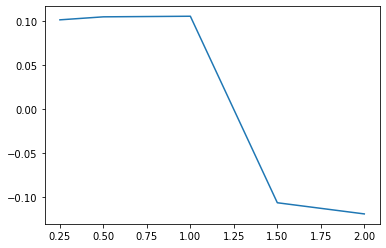

In [33]:
from matplotlib.pyplot import plot
plot(x,y)

# Tasas Forward

In [38]:
class ForwardRates(object):
    def __init__(self):
        self.forward_rates=[]
        self.spot_rates=dict()
    def add_spot_rate(self,T,spot_rate):
        self.spot_rates[T]=spot_rate
    def __calculate_forward_rate__(self,T1,T2):
        R1=self.spot_rates[T1]
        R2=self.spot_rates[T2]
        forward_rate=(R2*T2-R1*T1)/T2-T1
        return forward_rate
    def get_forward_rates(self):
        periods=sorted(self.spot_rates.keys())
        for T2,T1 in zip(periods,periods[1:]):
            forward_rate=self.__calculate_forward_rate__(T1,T2)
            self.forward_rates.append(np.round(forward_rate,2))
        return self.forward_rates

In [39]:
fr=ForwardRates()

In [40]:
fr.add_spot_rate(0.25,10.127)
fr.add_spot_rate(0.5,10.469)
fr.add_spot_rate(1,10.536)
fr.add_spot_rate(1.5,10.681)
fr.add_spot_rate(2,10.8)

In [41]:
fr.get_forward_rates()

[-11.31, -11.6, -6.99, -5.72]